# U.S. Medical Insurance Costs

In [13]:
import csv
with open("insurance.csv") as file:
    reader = csv.reader(file)
    for i , row in enumerate(reader):
        print(i, row)
        if i == 5:
            break
    

0 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
1 ['19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924']
2 ['18', 'male', '33.77', '1', 'no', 'southeast', '1725.5523']
3 ['28', 'male', '33', '3', 'no', 'southeast', '4449.462']
4 ['33', 'male', '22.705', '0', 'no', 'northwest', '21984.47061']
5 ['32', 'male', '28.88', '0', 'no', 'northwest', '3866.8552']


In [19]:
import csv
ages = []
charges = []
with open("insurance.csv") as file:
    reader = csv.DictReader(file)
    for row in reader:
        ages.append(int(row["age"]))
        charges.append(float(row["charges"]))
        
    

In [23]:
average_charge = sum(charges) / len(charges)
print(average_charge)
average_age = sum(ages) / len(ages)
print(average_age)

13270.422265141257
39.20702541106129


In [29]:
import csv
def load_insurance_data(filepath):
    data = []
    with open(filepath , newline = "") as file:
        reader = csv.DictReader(file)
        for row in reader:
            row["age"] = int(row["age"])
            row["bmi"] = float(row["bmi"])
            row["children"] = int(row["children"])
            row["charges"] = float(row["charges"])      
            data.append(row)
    return data
insurance_data = load_insurance_data("insurance.csv")
print(insurance_data[:5])  # Print the first 5 records to verify the data   

[{'age': 19, 'sex': 'female', 'bmi': 27.9, 'children': 0, 'smoker': 'yes', 'region': 'southwest', 'charges': 16884.924}, {'age': 18, 'sex': 'male', 'bmi': 33.77, 'children': 1, 'smoker': 'no', 'region': 'southeast', 'charges': 1725.5523}, {'age': 28, 'sex': 'male', 'bmi': 33.0, 'children': 3, 'smoker': 'no', 'region': 'southeast', 'charges': 4449.462}, {'age': 33, 'sex': 'male', 'bmi': 22.705, 'children': 0, 'smoker': 'no', 'region': 'northwest', 'charges': 21984.47061}, {'age': 32, 'sex': 'male', 'bmi': 28.88, 'children': 0, 'smoker': 'no', 'region': 'northwest', 'charges': 3866.8552}]


In [32]:
def filter_by_smoker_status(data, smoker_status):
    return [row for row in data if row["smoker"] == smoker_status]
smokers = filter_by_smoker_status(insurance_data , "yes")
non_smokers = filter_by_smoker_status(insurance_data , "no")
print(f"Number of smokers: {len(smokers)}")
print(f"Number of non-smokers: {len(non_smokers)}")

Number of smokers: 274
Number of non-smokers: 1064


In [ ]:
def average_charges(data):
    total = sum( row["charges"] for row in data)
    return round(total/len(data ), 3)



In [39]:
def smoker_cost_comparison(data):
    smokers = filter_by_smoker_status(insurance_data , "yes")
    non_smokers = filter_by_smoker_status(insurance_data , "no")
    avg_smoker_cost = average_charges(smokers)
    avg_non_smoker_cost= average_charges(non_smokers)
    return{"avg_smoker_cost": round(avg_smoker_cost, 2),
           "avg_non_smoker_cost": round(avg_non_smoker_cost, 2),
           "difference": round(avg_smoker_cost - avg_non_smoker_cost, 2)}
results = smoker_cost_comparison(insurance_data)
print("Average charges for smokers:", results["avg_smoker_cost"])
print("Average charges for non-smokers:", results["avg_non_smoker_cost"]) 
print("Difference in average charges:", results["difference"])  

Average charges for smokers: 32050.23
Average charges for non-smokers: 8434.27
Difference in average charges: 23615.96


In [50]:
import pandas as pd
insurance_df = pd.read_csv("insurance.csv")
#print(insurance_df.head())
#print(insurance_df.describe())
#print(insurance_df.info())
#print(insurance_df['smoker'].value_counts())
#print(insurance_df.groupby('smoker')['charges'].mean())
print(insurance_df.groupby("region")["bmi"].mean())
print(insurance_df.dtypes)
print(insurance_df.describe)

region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female

In [59]:
import pandas as pd
insurance_df = pd.read_csv("insurance.csv")
ages = insurance_df["age"]
smokers = insurance_df["smoker"]
print(smokers.head())
print(ages)

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object
0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64


In [58]:
with open("insurance.csv", "r") as file:
    reader = csv.DictReader(file)
    ages = []
    sexes = []
    bmis = []
    children = []
    smokers = []
    regions = []
    charges = []
    for row in reader:
        ages.append(int(row["age"]))
        sexes.append(row["sex"])
        bmis.append(float(row["bmi"]))
        children.append(int(row["children"]))
        smokers.append(row["smoker"])
        regions.append(row["region"])
        charges.append(float(row["charges"]))
print(ages[:5])
print(sexes[:5])
print(charges[:5])

[19, 18, 28, 33, 32]
['female', 'male', 'male', 'male', 'male']
[16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]


In [64]:
class InsuranceAnalysis:
    def __init__(self, data):
        self.data = data
    def average_cost(self):
        charges = [ row["charges"]for row in self.data]
        return sum(charges) / len(charges)
    def average_cost_by_smoker(self):
        smokers = [row["charges"] for row in self.data if row["smoker"] == "yes"]
        non_smokers = [ row["charges"] for row in self.data if row["smoker"] == "no"]
        return sum(smokers) / len(smokers), sum(non_smokers)/ len(non_smokers)
    def count_by_children(self):
        children_count = {}
        for row in self.data:
            children = row["children"]
            children_count[children] = children_count.get(children,0) +1
        return children_count
analysis = InsuranceAnalysis(insurance_data)
print("Average insurance cost:", analysis.average_cost())
print("Average cost by smoker status:", analysis.average_cost_by_smoker())
print("Count by number of children:", analysis.count_by_children())
        
        
        
    

Average insurance cost: 13270.422265141257
Average cost by smoker status: (32050.23183153285, 8434.268297856202)
Count by number of children: {0: 574, 1: 324, 3: 157, 2: 240, 5: 18, 4: 25}


In [95]:
import pandas as pd 
pd.reset_option("display.max_rows")
df = pd.read_csv("insurance.csv")
numeric_corr = df.corr(numeric_only = True)["charges"].sort_values(ascending=False)
numeric_corr_dict = numeric_corr.to_dict()
print(numeric_corr_dict)
smoker_stats = df.groupby("smoker")["charges"].mean()
print(smoker_stats)
smoker_ratio = smoker_stats["yes"] / smoker_stats["no"]
print(smoker_ratio)
sex_stats = df.groupby("sex")["charges"].mean()
print(sex_stats)
region_stats = df.groupby("region")["charges"].mean()
print(region_stats)
findings = { "numeric_correlations": numeric_corr_dict,"smoker_avg_charges": smoker_stats.to_dict(), "smoker_COST_ratio": smoker_ratio, "sex_avg_charges":sex_stats.to_dict(),"region-avg_charges": region_stats.to_dict()}
print(findings)
predictions = { "Most influential feature": "Smoking status",
               "High cost profile": "Smoker, older age , higher BMI",
               "Low cost profile": "Non-smoker , younger age, lower BMI"}
print(predictions)
age_distribution = df["age"].value_counts()
gender_distribution = df["sex"].value_counts()
smoker_distribution = df["smoker"].value_counts()
print(age_distribution[:5])
print(gender_distribution[:5])
print(smoker_distribution.to_dict())


{'charges': 1.0, 'age': 0.299008193330648, 'bmi': 0.19834096883362903, 'children': 0.06799822684790495}
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
3.800001458298319
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64
{'numeric_correlations': {'charges': 1.0, 'age': 0.299008193330648, 'bmi': 0.19834096883362903, 'children': 0.06799822684790495}, 'smoker_avg_charges': {'no': 8434.268297856202, 'yes': 32050.23183153285}, 'smoker_COST_ratio': np.float64(3.800001458298319), 'sex_avg_charges': {'female': 12569.578843835347, 'male': 13956.751177721893}, 'region-avg_charges': {'northeast': 13406.384516385804, 'northwest': 12417.575373969232, 'southeast': 14735.41143760989, 'southwest': 12346.937377292308}}
{'Most influential feature': 'Smoking status', 'High cost profile': 'Smoker, older age , 

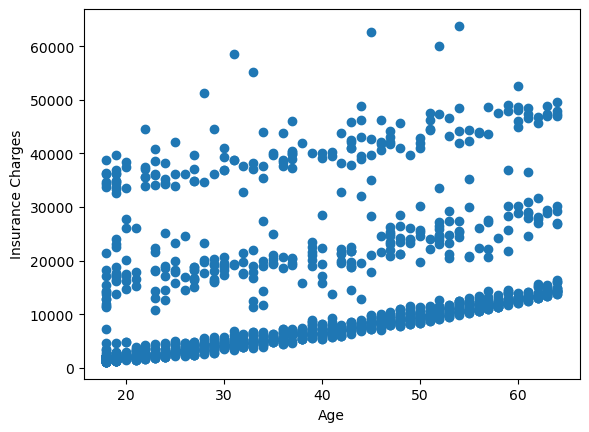

In [97]:
import matplotlib.pyplot as plt
plt.scatter(df["age"],df["charges"])
plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.show()